In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# Load the dataset
df = pd.read_csv("C:\\Users\\Srivathsav\\Downloads\\archive\\Admission_Predict.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [5]:
df.shape

(400, 9)

In [6]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [9]:
df.nunique()

Serial No.           400
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 168
Research               2
Chance of Admit       60
dtype: int64

In [10]:
df[df.duplicated()]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [12]:
df.drop(columns=['Serial No.'], axis=1, inplace=True)

In [13]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [24]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

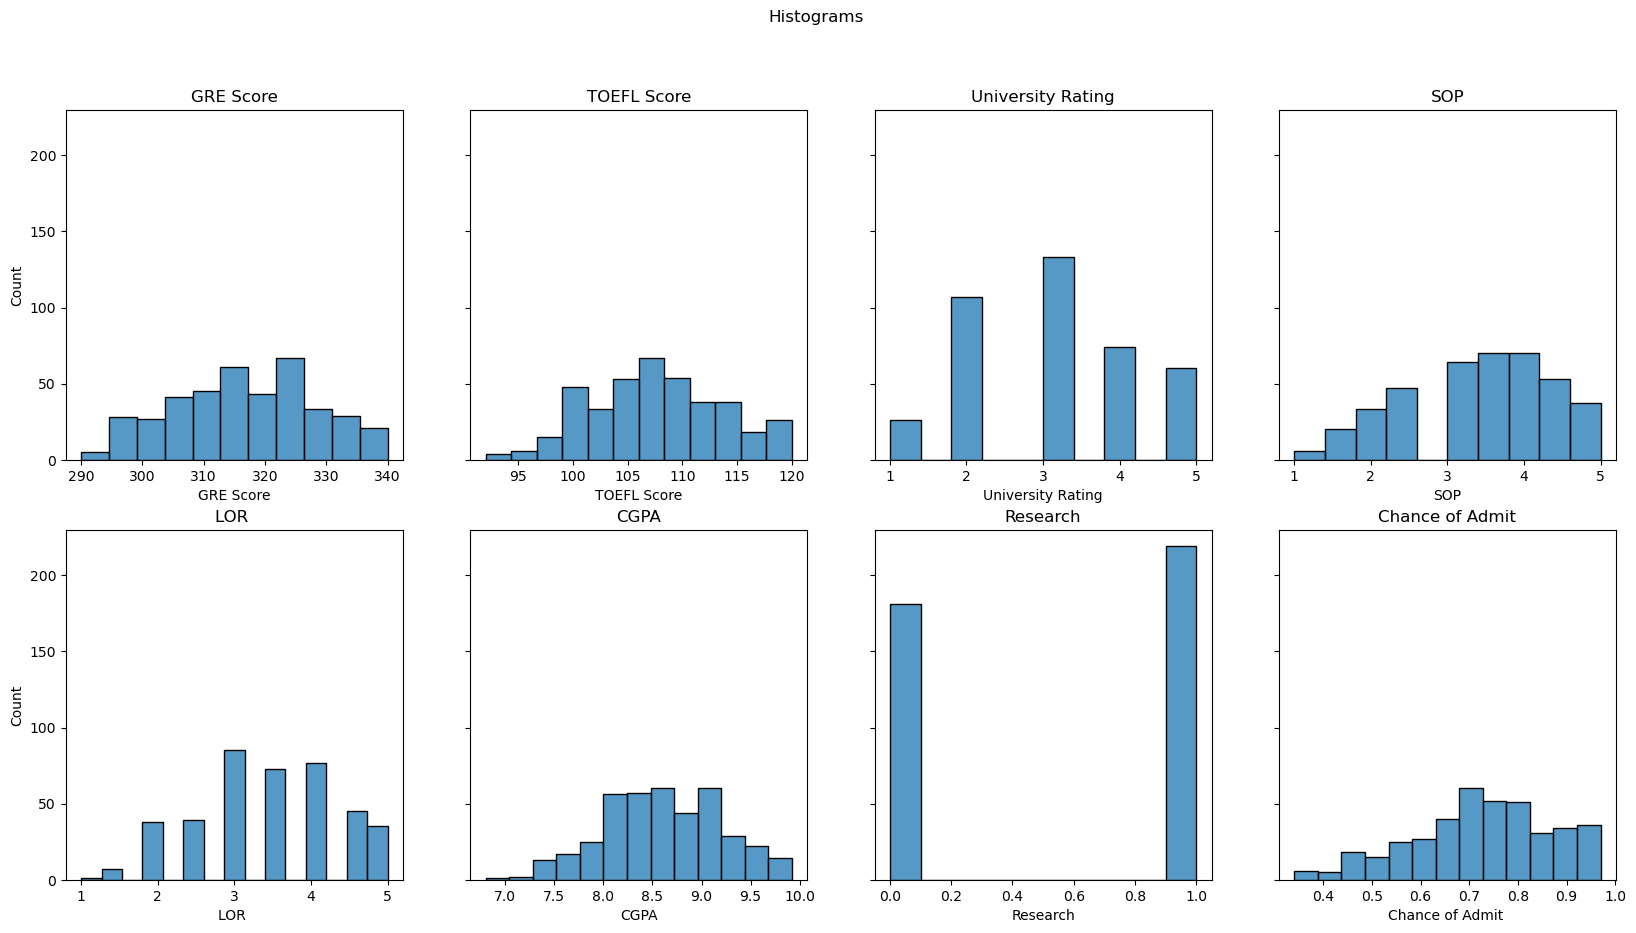

In [26]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharey=True)
fig.suptitle('Histograms')

sns.histplot(ax=axes[0][0], x=df["GRE Score"])
axes[0][0].set_title("GRE Score")

sns.histplot(ax=axes[0][1], x=df["TOEFL Score"])
axes[0][1].set_title("TOEFL Score")

sns.histplot(ax=axes[0][2], x=df["University Rating"])
axes[0][2].set_title("University Rating")

sns.histplot(ax=axes[0][3], x=df["SOP"])
axes[0][3].set_title("SOP")

sns.histplot(ax=axes[1][0], x=df["LOR "])
axes[1][0].set_title("LOR ")

sns.histplot(ax=axes[1][1], x=df["CGPA"])
axes[1][1].set_title("CGPA")

sns.histplot(ax=axes[1][2], x=df["Research"])
axes[1][2].set_title("Research")

sns.histplot(ax=axes[1][3], x=df["Chance of Admit "])
axes[1][3].set_title("Chance of Admit")

plt.show()


In [31]:
df["University Rating"].value_counts().sort_index()

1     26
2    107
3    133
4     74
5     60
Name: University Rating, dtype: int64

In [32]:
df["SOP"].value_counts().sort_index()

1.0     6
1.5    20
2.0    33
2.5    47
3.0    64
3.5    70
4.0    70
4.5    53
5.0    37
Name: SOP, dtype: int64

In [33]:
df["LOR "].value_counts().sort_index()

1.0     1
1.5     7
2.0    38
2.5    39
3.0    85
3.5    73
4.0    77
4.5    45
5.0    35
Name: LOR , dtype: int64

In [34]:
df["Research"].value_counts().sort_index()

0    181
1    219
Name: Research, dtype: int64

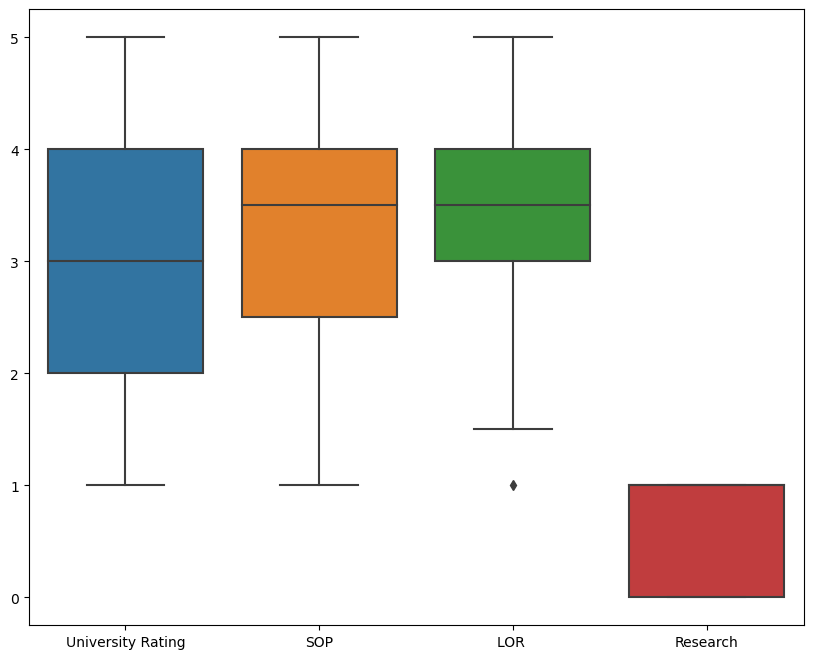

In [35]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df[["University Rating", "SOP", "LOR ", "Research"]])
plt.show()

<Figure size 640x480 with 0 Axes>

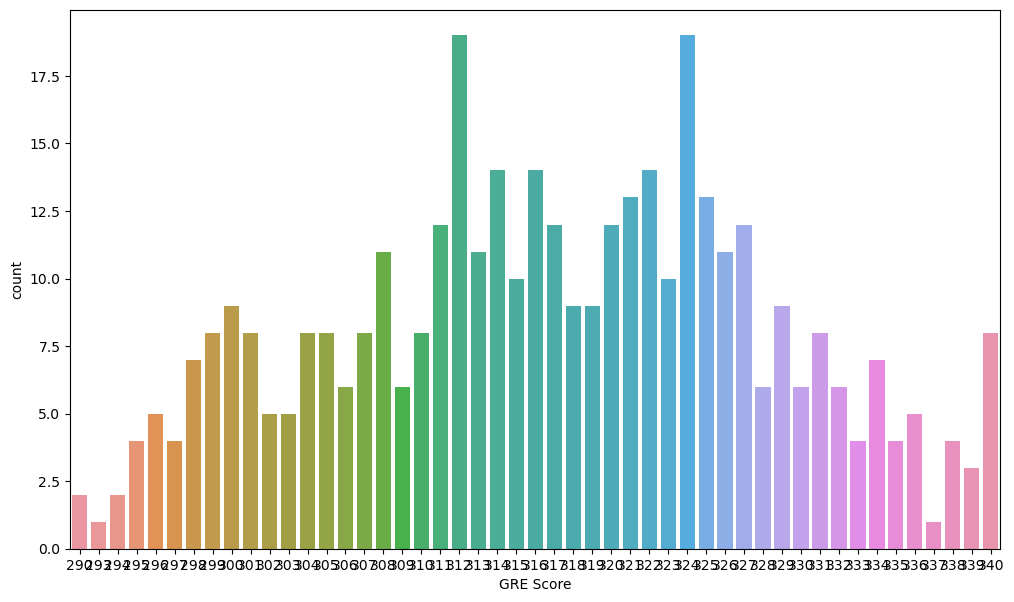

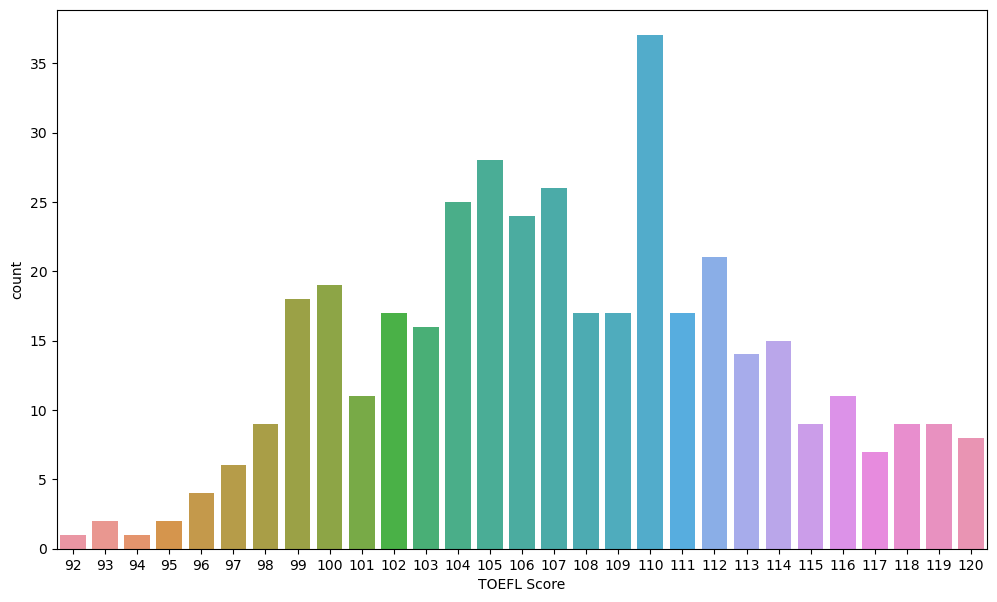

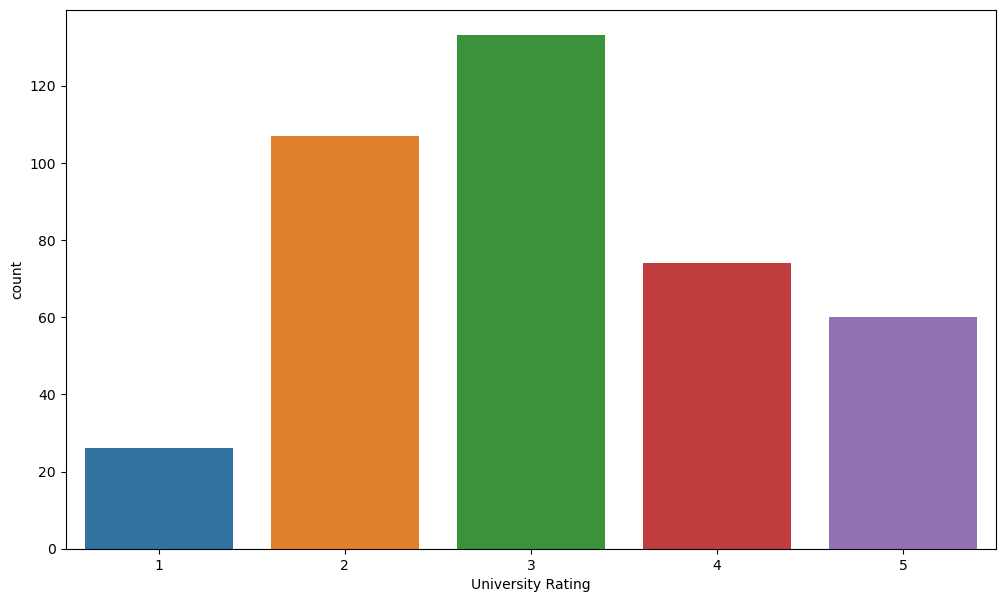

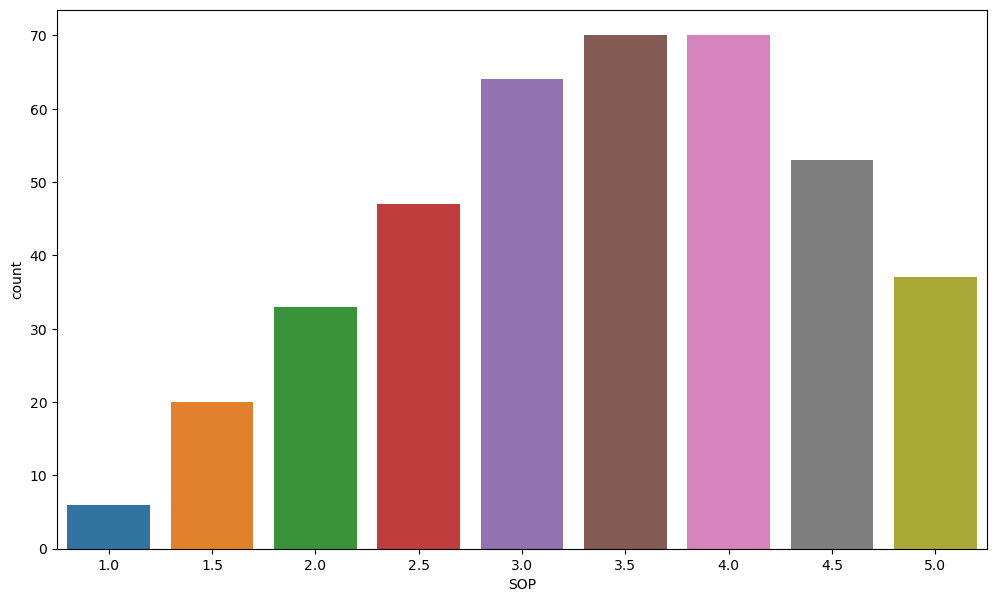

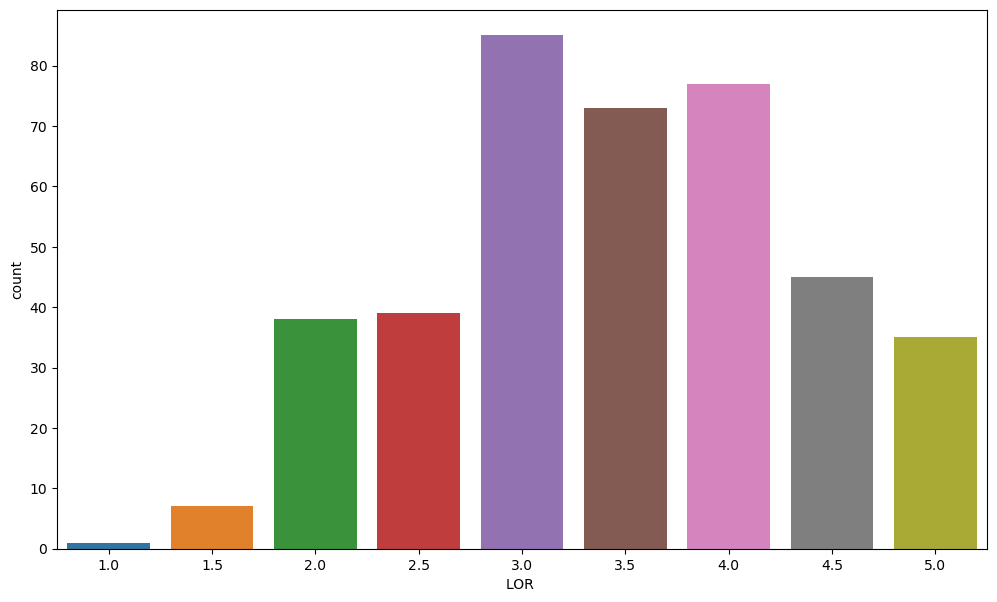

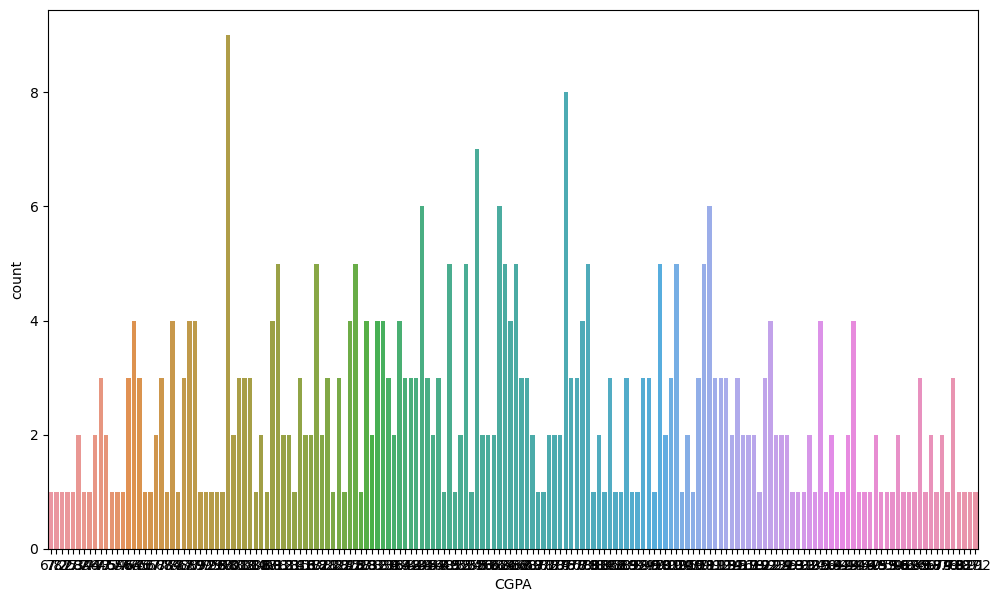

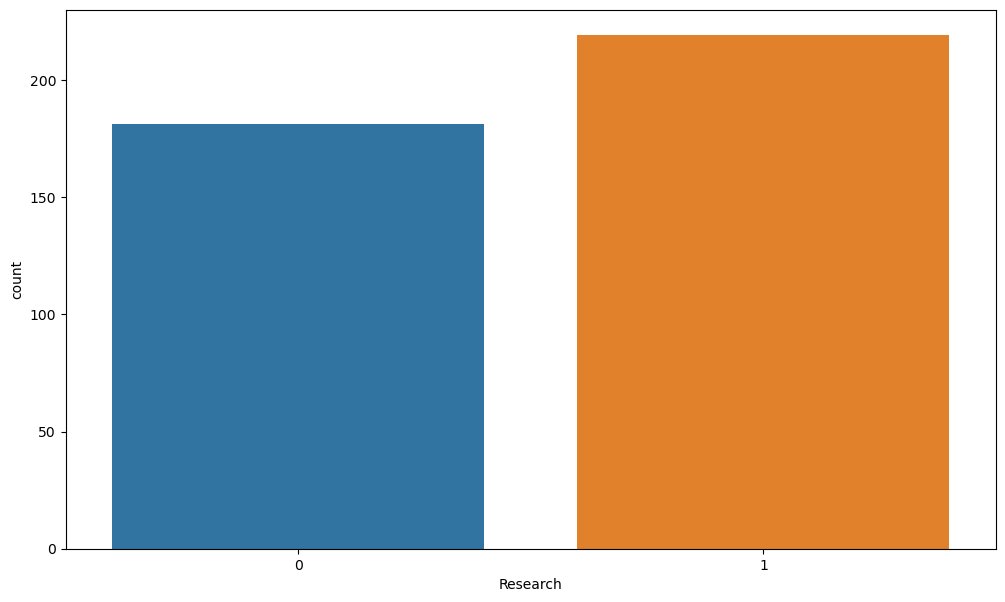

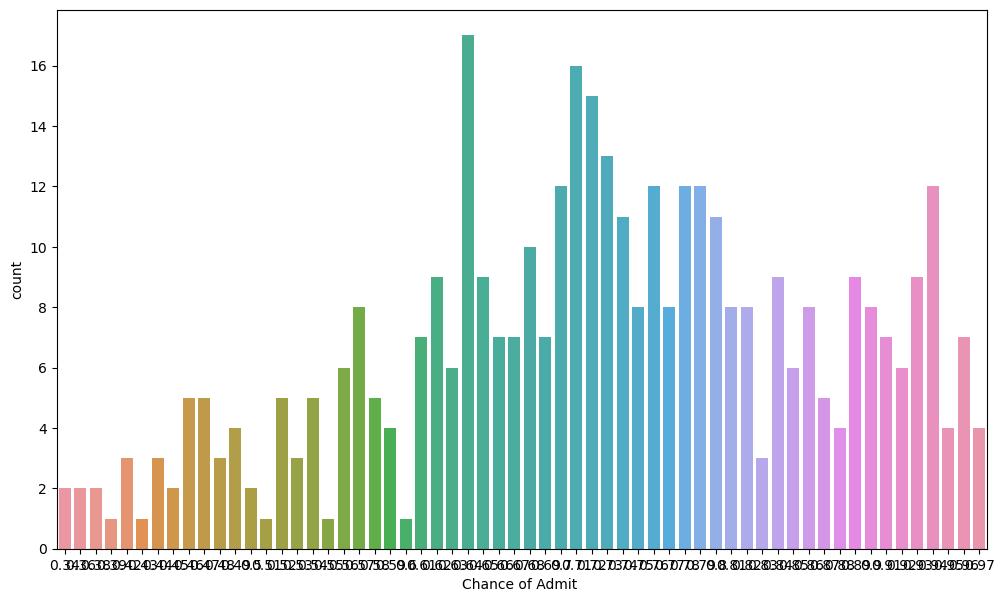

In [36]:
for i, col in enumerate(df.columns):
    plt.figure(i)
    plt.figure(figsize=(12,7))
    sns.countplot(x=col, data=df)

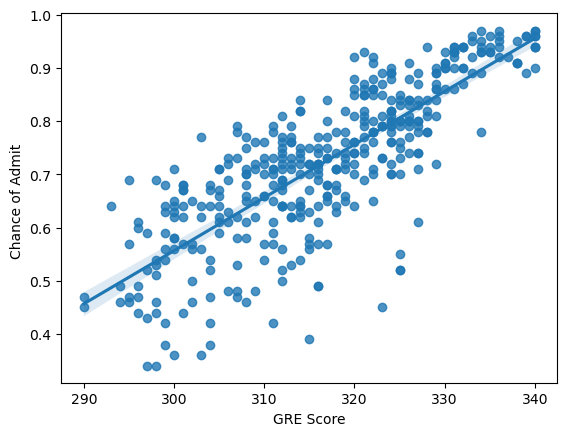

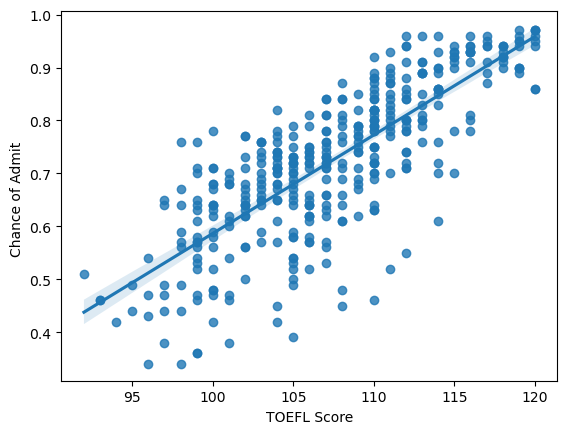

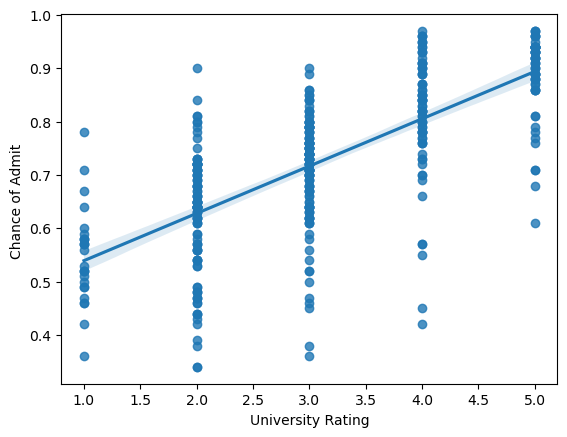

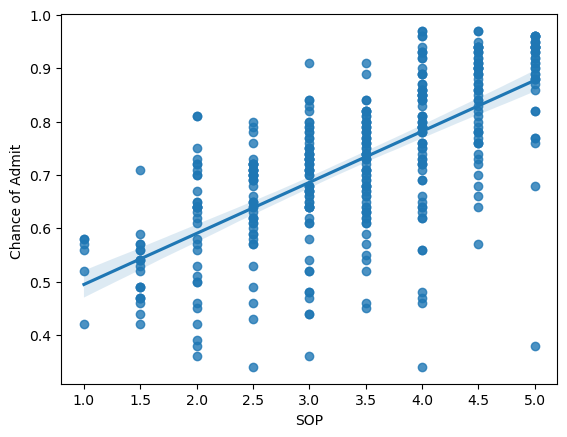

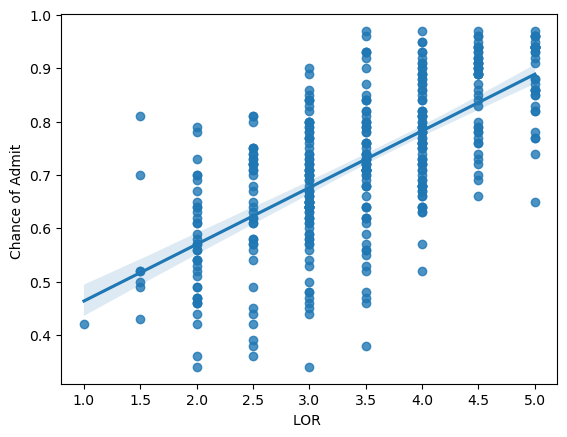

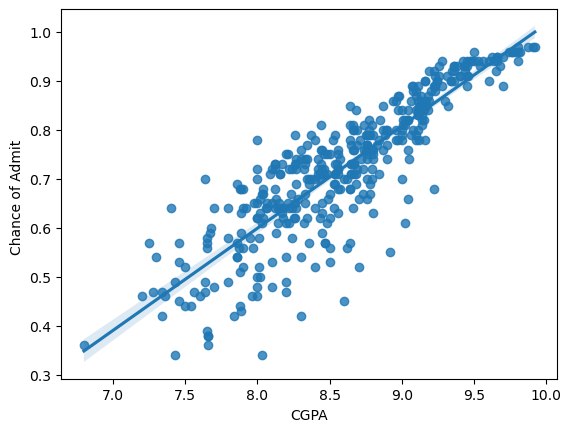

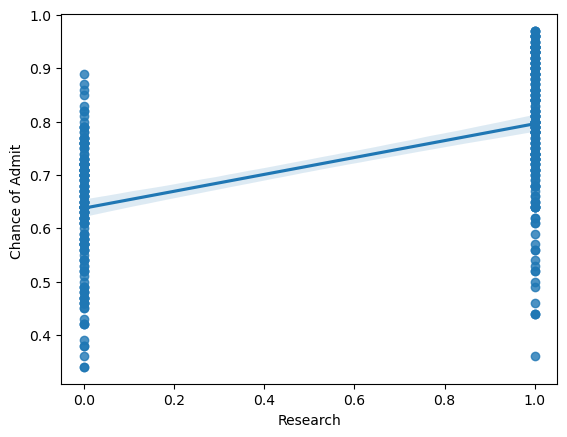

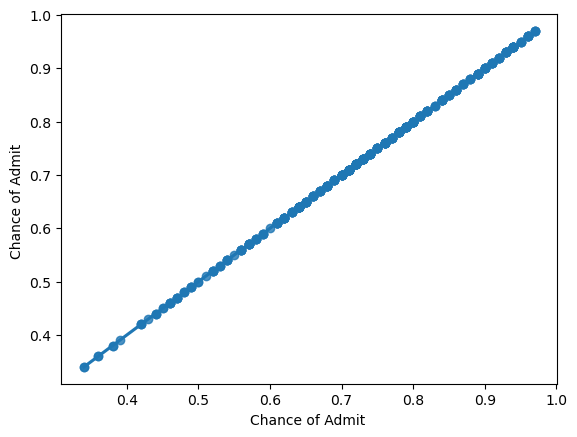

In [38]:
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.regplot(x=col, y="Chance of Admit ", data=df)

<Axes: >

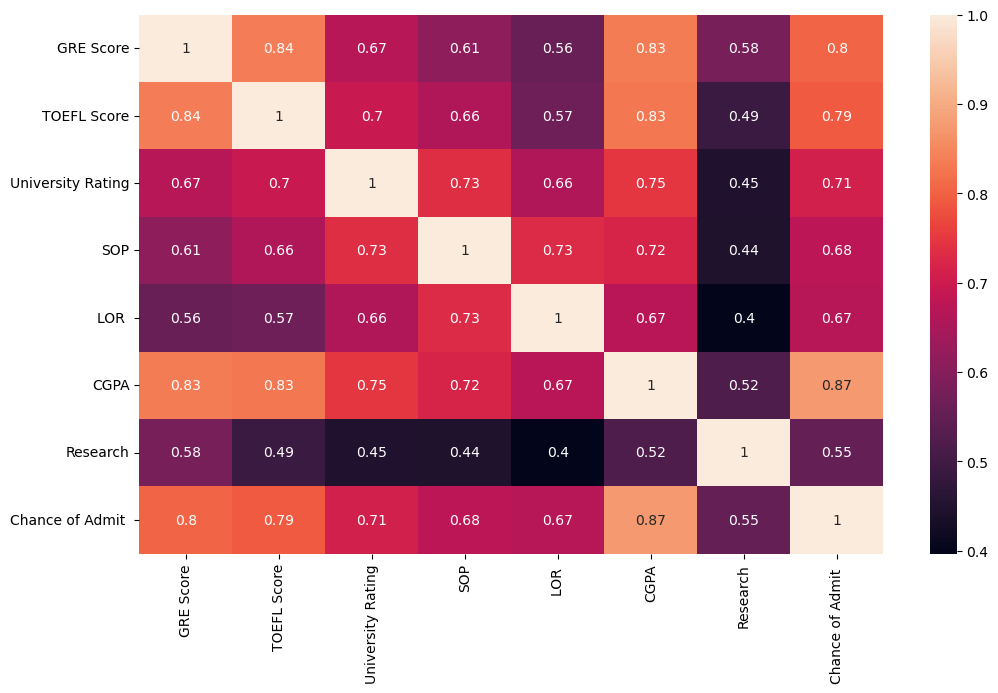

In [39]:
corrMatrix = df.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corrMatrix, annot=True)

In [45]:
# Convert Chance of Admit to binary outcome
df['Admitted'] = df['Chance of Admit '].apply(lambda x: 1 if x >= 0.5 else 0)

In [49]:
df = df.drop("Chance of Admit ", axis = 'columns')

In [51]:
# Split the data into features and target
X = df.drop(['Admitted'], axis=1)
y = df['Admitted']

In [52]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Create and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Srivathsav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.875
